In [1]:
#Clonamos el respositorio
!git clone https://github.com/nramrezmoreale/proyecto-properati-unicaba2025

Cloning into 'proyecto-properati-unicaba2025'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 2.44 MiB | 3.55 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
#Subimos dentro de proyecto-properati-unicaba2025 el archivo entrenamiento.csv
#Verificamos la existencia del directorio raíz del proyecto
!ls

proyecto-properati-unicaba2025	sample_data


In [3]:
#Navegamos dentro del directorio raíz del proyecto
%cd proyecto-properati-unicaba2025

/content/proyecto-properati-unicaba2025


In [4]:
#Verificamos los archivos existentes dentro del directorio raíz
#Debería figurar el archivo que subimos: entrenamiento.csv
!ls

1_preprocesamiento.ipynb  LICENSE	       README.md
entrenamiento.csv	  properati_clean.csv  requirements.txt


In [8]:
# ======================================================
# 1. PREPROCESAMIENTO - PROYECTO PROPERATI ARGENTINA
# ======================================================
# Integrantes principales de este notebook:
# 1️⃣ Nicolás Paul Ramírez Moreale — Data Engineer (Carga y Limpieza)
# 2️⃣ Camila Funes — Feature Engineer (Transformación)
# ======================================================

# 🔹 Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
# ======================================================
# 1) CARGA DEL DATASET
# ======================================================
# Carga del archivo 'entrenamiento.csv' directamente desde la ruta en Colab
file_name = "entrenamiento.csv"
df = pd.read_csv(file_name)

print("✅ Archivo cargado correctamente:", file_name)
print("Filas y columnas:", df.shape)
print("Columnas disponibles:\n", df.columns.tolist())

df.head()

✅ Archivo cargado correctamente: entrenamiento.csv
Filas y columnas: (274292, 25)
Columnas disponibles:
 ['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency', 'price_period', 'title', 'description', 'property_type', 'operation_type', 'price']


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [10]:
# ======================================================
# 2) LIMPIEZA DE DATOS (Nicolás Paul)
# ======================================================
# - Eliminación de nulos
# - Filtro de precios razonables
# - Creación del campo price_per_m2

# Detectamos columnas de interés
col_precio = "price" if "price" in df.columns else ("price_aprox_usd" if "price_aprox_usd" in df.columns else "price_usd")
col_superficie = "surface_total" if "surface_total" in df.columns else "surface_total_in_m2"

df = df.dropna(subset=[col_precio, col_superficie])
df = df[(df[col_precio] > 0) & (df[col_precio] < 1_000_000)]
df = df[df[col_superficie] > 0]

# Nueva variable: precio por m2
df["price_per_m2"] = df[col_precio] / df[col_superficie]

print("Dataset limpio:", df.shape)
df.describe().T


Dataset limpio: (148743, 26)


,count,mean,std,min,25%,50%,75%,max
id,148743.0,137585.060628,104383.547733,2.000000,61093.500000,130796.000000,196690.000000,997781.000000
lat,130375.0,-59.211722,2.531127,-86.106488,-58.704452,-58.462381,-58.404756,-35.045025
lon,130375.0,-34.389140,2.975147,-54.828087,-34.634785,-34.592274,-34.456412,44.652432
l6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,105958.0,2.879028,1.623078,1.000000,2.000000,3.000000,4.000000,40.000000
bedrooms,70171.0,2.137008,1.203794,-2.000000,1.000000,2.000000,3.000000,34.000000
bathrooms,125667.0,1.652693,1.014877,1.000000,1.000000,1.000000,2.000000,20.000000
surface_total,148743.0,366.826970,3102.388237,10.000000,49.000000,85.000000,223.000000,200000.000000
surface_covered,128609.0,162.859170,1801.739917,1.000000,43.000000,70.000000,135.000000,278353.000000
price,148743.0,152697.515950,174765.750811,50.000000,27800.000000,95000.000000,200000.000000,999999.000000


In [11]:
# ======================================================
# 3) FEATURE ENGINEERING (Camila Funes)
# ======================================================
# - Selección de variables relevantes
# - Creación de nuevas features si aplica
# - División del dataset limpio

features = ["surface_total", "rooms", "bathrooms"]
target = col_precio

df = df[features + [target, "price_per_m2"]].dropna()
print("Columnas finales:", df.columns.tolist())


Columnas finales: ['surface_total', 'rooms', 'bathrooms', 'price', 'price_per_m2']


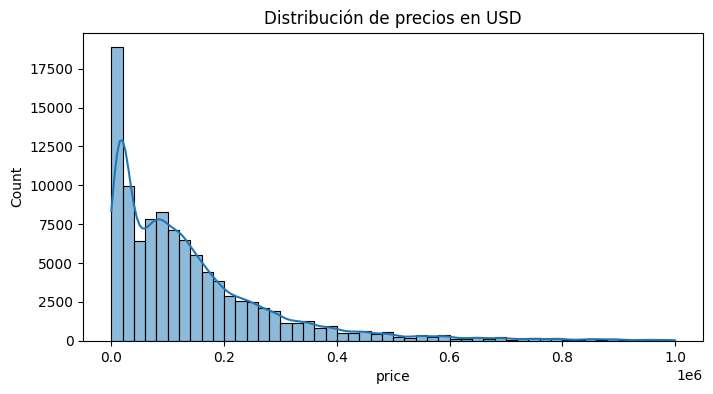

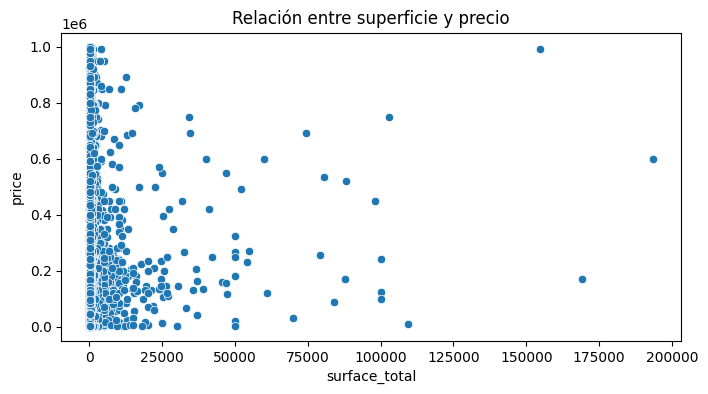

In [12]:
# ======================================================
# 4) VISUALIZACIÓN EXPLORATORIA
# ======================================================

plt.figure(figsize=(8,4))
sns.histplot(df[target], bins=50, kde=True)
plt.title("Distribución de precios en USD")
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="surface_total", y=target)
plt.title("Relación entre superficie y precio")
plt.show()

In [ ]:
# ======================================================
# 5) GUARDADO DEL DATASET LIMPIO
# ======================================================

#Definimos la ruta base del repositorio clonado donde guardaremos el archivo resultado de la limpieza
repo_path = "/content/proyecto-properati-unicaba2025"

clean_path = f"{repo_path}/properati_clean.csv"

#Guardamos el DataFrame
df.to_csv(clean_path, index=False)
print(f"✅ Dataset limpio guardado en: {clean_path}")

✅ Dataset limpio guardado en: /content/proyecto-properati-unicaba2025/properati_clean_v2.csv
